In [ ]:
import random
import numpy as np

def roll_dice(n, seed):
    random.seed(seed)
    total_dice = 0
    point_dice = []
    for i in range(n):
        total_dice += 1       # Redundant.. for what?
        point_dice.append(random.randint(1, 6))
    mean_point_dice = np.mean(point_dice)
    return([total_dice, mean_point_dice])

In [ ]:
sum(list(range(1, 7)))/6 # theoretical mean

3.5

### **Law of Large Numbers**

In [ ]:
seed = 1231
for i in range(1, 5):
    print(roll_dice(10**i, seed))
    # As sample size increases, mean approaches theoretical mean

[10, np.float64(3.6)]
[100, np.float64(3.5)]
[1000, np.float64(3.495)]
[10000, np.float64(3.503)]


### **Exercise: Deterministic simulation**

The year 2022 saw record high inflation. There are many ways to think about what inflation in the future will be. In this exercise, you'll attempt to estimate future inflation using a deterministic model.

Deterministic models do not include any randomness and allow you to calculate the outcome of a future event exactly.

For this example, assume the inflation rate was 8.6% in 2022 and that there is a steady increase of 2% for inflation in each year following. Using these assumptions, what will the inflation rate be in 2050?

### **Instructions**

Using the `deterministic_inflation()` function defined in the editor, estimate inflation in 2050.

In [ ]:
def deterministic_inflation(year, yearly_increase_percent):
    inflation_rate = 8.6
    inflation_rate = inflation_rate*((100+yearly_increase_percent)/100)**(year-2022)
    return(inflation_rate)

# Print the deterministic simulation results
print(deterministic_inflation(2050, 2))

14.97280817309578


### **Exercise: Monte Carlo simulation**


Recall that stochastic models simulate randomness in variables by using sampling. This randomness means that each simulation will likely arrive at a different expected outcome, even if the inputs are the same.

In this exercise, assume 8.6% inflation in 2022 and a stochastic increase of 1%, 2%, or 3% each year over the previous year (with equal probabilities of 1%, 2%, or 3%) for the following years. What will the inflation rate look like in 2050 under these assumptions?

The **`random`** package has already been imported for you as **`random`**.

### **Instructions 1/2**

Use **`random.randint()`** to generate a random integer that represents the three possibilities for the `yearly_increase` in inflation each year: 1, 2, or 3 percent.

In [ ]:
def monte_carlo_inflation(year, seed):
    random.seed(seed)
    inflation_rate = 8.6
    yearly_increase = random.randint(1, 3)
    for i in range(year - 2022):
        inflation_rate = inflation_rate*((100 + yearly_increase)/100)
    return(inflation_rate)

* Using `monte_carlo_inflation()`, simulate the inflation rate for the `year` `2050` with a seed of `1234`.

* Using `monte_carlo_inflation()`, simulate the inflation rate for the `year` `2050` with a seed of `34228`.

In [ ]:
# Simulate the inflation rate for the year 2050 with a seed of 1234
print(monte_carlo_inflation(2050, 1234))

# Simulate the inflation rate for the year 2050 with a seed of 34228
print(monte_carlo_inflation(2050, 34228))

14.972808173095785
19.676178011340454


 You saw a difference in inflation of 5% by varying the seed, due to the stochastic nature of Monte Carlo simulations.

 What if you ran the inflation many times and took the average?

 ## **Exercise: LLN**

### **Instructions**

* Calculate the average of 1,000 simulations where a seed between 0 and 20,000 is randomly chosen each time.

* Calculate the average of 10,000 simulations where a seed between 0 and 20,000 is randomly chosen each time.

In [ ]:
# Calculate the average of 1,000 simulation results with a seed between 0 and 20000
rates_1 = []
for i in range(1000):
    seed = random.randint(0, 20000)
    rates_1.append(monte_carlo_inflation(2050, seed))
print(np.mean(rates_1))

# Calculate the average of 10,000 simulation results with a seed between 0 and 20000
rates_2 = []
for i in range(10000):
    seed = random.randint(0, 20000)
    rates_2.append(monte_carlo_inflation(2050, seed))
print(np.mean(rates_2))

16.419252608092123
16.54091167716656


With a large number of simulations, you can see the average inflation rate is now quite consistent. Contrary to what you saw in the last exercise, on average, the difference between the two simulations is now less than 1%!

# **Sampling without replacement**

In [ ]:
import random
def two_random_ne_states():
    ne_states=["Maine", "Vermont", "New Hampshire", "Massachusetts", "Connecticut", "Rhode Island"]
    return(random.sample(ne_states, 2))

print(two_random_ne_states())
two_random_ne_states()

['Massachusetts', 'New Hampshire']


['Rhode Island', 'Maine']

# **Bootstrapping**

Estimate the 95% confidence interval for the mean height of NBA players

In [ ]:
import random, numpy as np

nba_heights = [196, 191, 198, 216, 188, 185, 211, 201, 188, 191, 201, 208, 191, 183, 196]
simu_heights = []

for i in range(1000):
    bootstrap_sample = random.choices(nba_heights, k=15) # 15 = len(nba_heights)
    simu_heights.append(np.mean(bootstrap_sample))

upper = np.quantile(simu_heights, 0.975)
lower = np.quantile(simu_heights, 0.025)
print([float(np.mean(simu_heights)), float(lower), float(upper)])

[196.28113333333334, 191.59833333333333, 201.40166666666667]


## **Visualize bootstrap distribution**


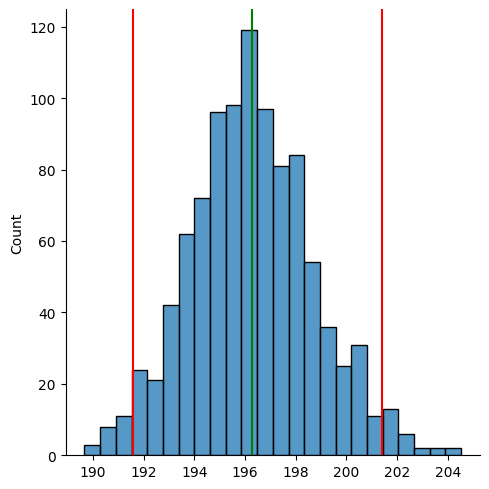

In [ ]:
import seaborn as sns, matplotlib.pyplot as plt

sns.displot(simu_heights)
plt.axvline(191.59833333333333, color="red")
plt.axvline(201.40166666666667, color="red")
plt.axvline(196.28113333333334, color="green")
plt.show()

# **Permutation**

Estimate 95% confidence interval of the mean difference between heights of NBA players and
US males

* Under the null hypothesis (no difference between NBA and US heights), it shouldn’t matter how you split the combined heights.  That is why you can do

  * `np.random.permutation(all_heights)`
  * `perm_sample[0:15], perm_sample[15:35]`

In [ ]:
us_heights = [165, 185, 179, 187, 193, 180, 178, 179, 171, 176, 169, 160, 140, 199, 176, 185, 175, 196, 190, 176]
nba_heights = [196, 191, 198, 216, 188, 185, 211, 201, 188, 191, 201, 208, 191, 183, 196]
all_heights = us_heights + nba_heights
simu_diff = []

for i in range(1000):
    perm_sample = np.random.permutation(all_heights)
    perm_nba, perm_adult = perm_sample[0:15], perm_sample[15:35] # len(nba_heights), len(us_heights)
    perm_diff = np.mean(perm_nba) - np.mean(perm_adult)
    simu_diff.append(perm_diff)

upper = np.quantile(simu_diff, 0.975)
lower = np.quantile(simu_diff, 0.025)
print(np.mean(nba_heights) - np.mean(us_heights))
print([float(lower), float(upper)])

18.31666666666669
[-10.383333333333326, 9.566666666666691]


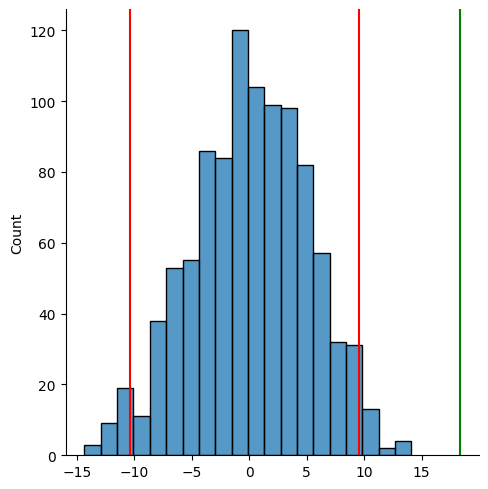

In [ ]:
sns.displot(simu_diff)
plt.axvline(-10.383333333333326, color="red")
plt.axvline(9.566666666666691, color="red")
plt.axvline(18.32, color="green")
plt.show()

The actual difference lies outside CI ==> significant

### **Exercise: Sampling with replacement**

Bootstrapping is great for calculating confidence intervals for means.

`nba_weights` contains the weights of a group of NBA players in kilograms:

```
nba_weights = [96.7, 101.1, 97.9, 98.1, 98.1, 100.3, 101.0, 98.0, 97.4]
```

You are interested in calculating the 95% confidence interval of the mean weight of NBA players using this list.

The following have been imported for you: `random`, and `numpy` as `np`.

### **Instructions**

* Use **`random.choices()`** to sample nine heights from the list 1,000 times, with replacement.

* Calculate the mean and 95% confidence interval for your simulation results, assigning the lower end of the confidence interval to `lower` and the upper end to `upper`.



In [ ]:
nba_weights = [96.7, 101.1, 97.9, 98.1, 98.1, 100.3, 101.0, 98.0, 97.4]
simu_weights = []

# Sample nine values from nba_weights with replacement 1000 times
for i in range(1000):
    bootstrap_sample = random.choices(nba_weights, k=9)
    simu_weights.append(np.mean(bootstrap_sample))

# Calculate the mean and 95% confidence interval of the mean for your results
mean_weight = np.mean(simu_weights)
upper = np.quantile(simu_weights, 0.975)
lower = np.quantile(simu_weights, 0.025)
print(mean_weight, lower, upper)

98.75127777777779 97.75500000000001 99.78916666666666


### **Exercise: Visualization of resampling results**

### **Instructions**

* Use **`sns.displot()`** to plot the distribution of the simulated weights.
* Use **`plt.axvline()`** to plot two vertical lines for the 95% confidence interval (plot `lower` followed by `upper`) in red, and the mean in green.

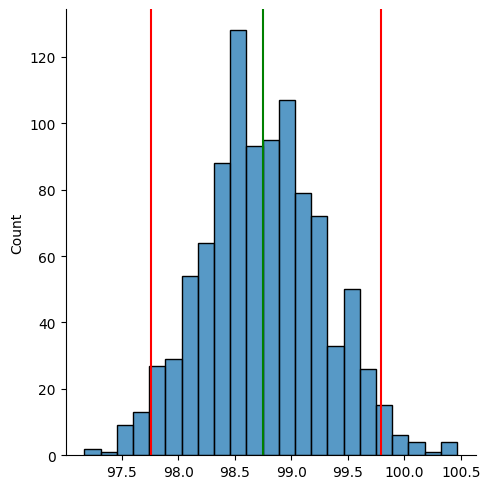

In [ ]:
# Plot the distribution of the simulated weights
sns.displot(simu_weights)

# Plot vertical lines for the 95% confidence intervals and mean
plt.axvline(lower, color="red")
plt.axvline(upper, color="red")
plt.axvline(mean_weight, color="green")
plt.show()

### **Exercise: Permutation**

Are NBA players heavier than US adult males? You are now interested in calculating the 95% confidence interval of the mean difference (in kilograms) between NBA players and US adult males. You'll use the two lists provided.

Permutation is great when testing for difference, so that's the resampling method you'll use here!

```
nba_weights = [96.7, 101.1, 97.9, 98.1, 98.1, 100.3, 101.0, 98.0, 97.4, 100.5, 100.3, 100.2, 100.6]
us_adult_weights = [75.1, 100.1, 95.2, 81.0, 72.0, 63.5, 80.0, 97.1, 94.3, 80.3, 93.5, 85.8, 95.1]
```

Note that each of the above lists has 13 weights listed.

### **Instructions**

* Define `all_weights` as a list which contains the values from both `nba_weights` and `us_adult_weights`.
* Perform the permutation on `all_weights` using **`np.random.permutation()`**.
* Assign the first 13 permutated samples to `perm_nba` and the remaining 13 to `perm_adult`.

In [ ]:
nba_weights = [96.7, 101.1, 97.9, 98.1, 98.1, 100.3, 101.0, 98.0, 97.4, 100.5, 100.3, 100.2, 100.6]
us_adult_weights = [75.1, 100.1, 95.2, 81.0, 72.0, 63.5, 80.0, 97.1, 94.3, 80.3, 93.5, 85.8, 95.1]

# Define all_weights
all_weights = nba_weights + us_adult_weights
simu_diff = []

for i in range(1000):
	# Perform the permutation on all_weights
    perm_sample = np.random.permutation(all_weights)
    # Assign the permutated samples to perm_nba and perm_adult
    perm_nba, perm_adult = perm_sample[:13], perm_sample[13:]
    perm_diff = np.mean(perm_nba) - np.mean(perm_adult)
    simu_diff.append(perm_diff)

mean_diff = np.mean(nba_weights) - np.mean(us_adult_weights)
upper = np.quantile(simu_diff, 0.975)
lower = np.quantile(simu_diff, 0.025)
print(mean_diff, lower, upper)

13.630769230769246 -8.062307692307707 8.155769230769222


The mean difference lies outside the 95% confidence interval, suggesting that given these two lists of samples, the NBA players' mean weight is significantly different from the average US adult males'.

### **Exercise: Paired dice simulation**

Similar to the example in the lesson, you will roll two dice from two bags, and each bag contains three biased dice.

```
bag1 = [[1, 2, 3, 6, 6, 6], [1, 2, 3, 4, 4, 6], [1, 2, 3, 3, 3, 5]]
bag2 = [[2, 2, 3, 4, 5, 6], [3, 3, 3, 4, 4, 5], [1, 1, 2, 4, 5, 5]]
```

The difference is that the dice in the two bags are paired: if you pick the second die in bag1, you will also pick the second die in bag2. In each trial:

- You pick one pair of dice from the two bags randomly and roll them
- Success occurs if the points on dice1 and dice2 add up to eight; otherwise, failure

Your task is to complete the for-loop in the `roll_paired_biased_dice()` function and to use this function to calculate the probabilities of success for each unique combination of points on `dice1` and `dice2`.

The following have been imported for you: **`random`**, **`numpy as np`**, **`pandas as pd`**, **`seaborn as sns`** and **`matplotlib.pyplot as plt`**.

### **Instructions 1/2**

* Use **`random.randint()`** to obtain the dice indices (each a number from 0 to 5).

* Use `bag_index` followed by the correct `dice_index` to sample a pair of dice from `bag1` and `bag2`.

In [ ]:
import random, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

bag1 = [[1, 2, 3, 6, 6, 6], [1, 2, 3, 4, 4, 6], [1, 2, 3, 3, 3, 5]]
bag2 = [[2, 2, 3, 4, 5, 6], [3, 3, 3, 4, 4, 5], [1, 1, 2, 4, 5, 5]]

def roll_paired_biased_dice(n, seed=1231):
    results={}
    random.seed(seed)
    for i in range(n):
        bag_index = random.randint(0, 1)
        # Obtain the dice indices
        dice_index1 = random.randint(0, 5)
        dice_index2 = random.randint(0, 5)
        # Sample a pair of dice from bag1 and bag2
        point1 = bag1[bag_index][dice_index1]
        point2 = bag2[bag_index][dice_index2]
        key = "%s_%s" % (point1,point2)
        if point1 + point2 == 8:
            if key not in results:
                results[key] = 1
            else:
                results[key] += 1
    return(pd.DataFrame.from_dict({'dice1_dice2':results.keys(), 'probability_of_success':np.array(list(results.values()))*100.0/n}))

roll_paired_biased_dice(10000, 1231)

,dice1_dice2,probability_of_success
0,6_2,8.44
1,3_5,2.73
2,2_6,1.26
3,4_4,5.91


**Instruction 2/2**

* Run the simulation 10,000 times, assigning the results DataFrame to `df_results` so that it can be plotted; use a seed of `1231`.

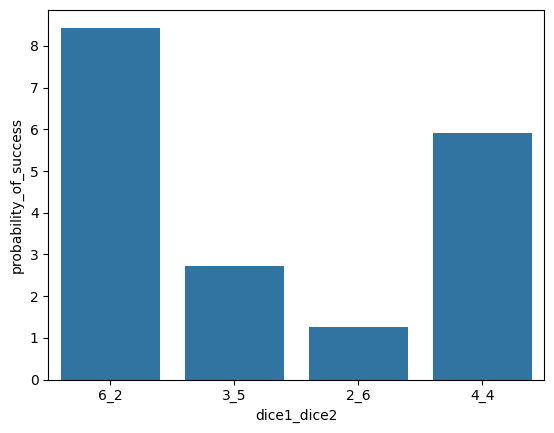

In [ ]:
df_results = roll_paired_biased_dice(10000, 1231)
sns.barplot(x="dice1_dice2", y="probability_of_success", data=df_results)
plt.show()

# **Simulation steps**

1. Define the input variables and pick probability distributions for them
2. Generate inputs by sampling from these distributions
3. Perform a deterministic calculation of the simulated inputs
4. Summarize results

## **Calculate $\pi$**

Generate random points $(x, y)$ where $x$ and $y$
are in the interval from -1 to 1.

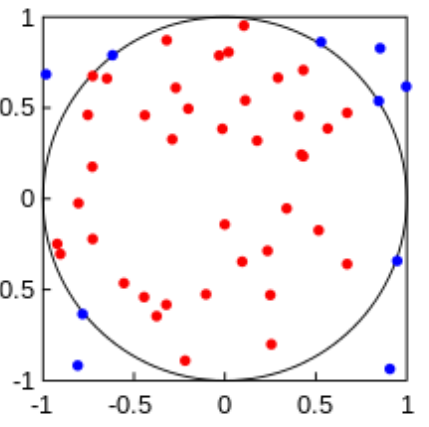

Area $\circ$ = $\pi r^2 = \pi \times 1^2 = \pi$

Area $\sqcap = 2 \times 2 = 4$

$\frac{\circ}{\sqcap} = \frac{\pi}{4} \approx \frac{\# reds }{\# all}$

$$\pi \approx 4\times \frac{\# reds }{\# all}$$

## **Step 1**

* Define the input variables and pick probability distributions for them

    * Inputs: the individual points represented by $(x, y)$ coordinates
    * Probability distributions: $x$ and $y$ follow uniform distributions from negative one to one.

## **Step 2**

Generate inputs by sampling from these distributions
Sample random $x$ and $y$ coordinate values distributed uniformly between -1 and 1:

## **Step 3**

Perform deterministic calculation of the simulated inputs

Check whether each point lies within the circle: deterministic for given $x$ and $y$

## **Step 4**
Summarize the results to answer questions of interest

In [ ]:
import random, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

cir, sq = 0, 0
xs, ys = np.random.uniform(-1, 1, size=10000000), np.random.uniform(-1, 1, size=10000000)

for x, y in zip(xs, ys):
    if x**2 + y**2 <= 1:
        cir += 1
    sq += 1

print(4 * cir/sq)



3.1416232


### **Exercise: Wrong deterministic calculation**

Increment `circle_points` for any point with a distance from origin of less than 0.75 (rather than a distance of one).

In [ ]:
n = 10000
circle_points = 0
square_points = 0
for i in range(n):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    dist_from_origin = x**2 + y**2
    # Increment circle_points for any point with a distance from origin of less than .75
    if dist_from_origin < .75:
        circle_points += 1
    square_points += 1
pi = 4 * circle_points / square_points
print(pi)

2.3356


### **Exercise: Wrong input distributions**

* Sample the $x$ and $y$ coordinates in the interval from -1 to 1 using `random.randint()` rather than the correct `random.uniform()` function

In [ ]:
n = 10000
circle_points = 0
square_points = 0
for i in range(n):
    # Sample the x and y coordinates from -1 to 1 using random.randint()
    x = random.randint(-1, 1)
    y = random.randint(-1, 1)
    dist_from_origin = x**2 + y**2
    if dist_from_origin <= 1:
        circle_points += 1
    square_points += 1
pi = 4 * circle_points / square_points
print(pi)

2.2444


# **Discrete uniform distribution**

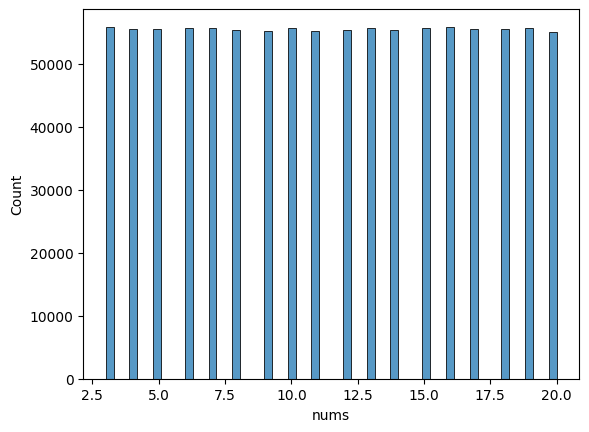

In [ ]:
import scipy.stats as st, seaborn as sns, pandas as pd, numpy as np, matplotlib.pyplot as plt

low = 3
high = 21
samples = st.randint.rvs(low, high, size=1000000)
samples_dict = {"nums":samples}
sns.histplot(x="nums", data=samples_dict, bins=6, binwidth=0.3)
plt.show()

# **Geometric distribution**

The probability distribution of the number of trials, $X$, needed to get one success, given the
success probability, $p$.

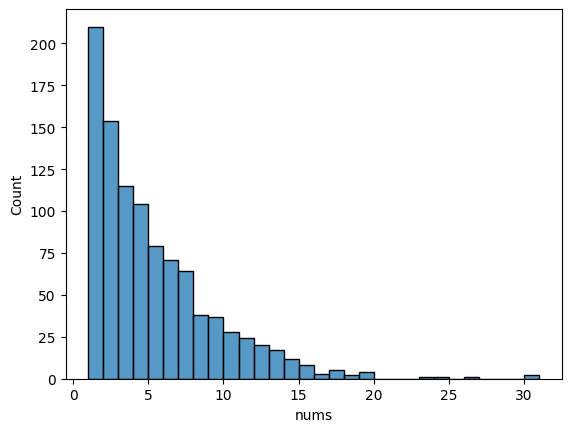

In [ ]:
p = 0.2
samples = st.geom.rvs(p, size=1000)
samples_dict = {"nums":samples}
sns.histplot(x="nums", data=samples_dict)
plt.show()

### **Exercise: Simulate the game**

Tom has a regular six-faced die and the results of rolling it follow a discrete uniform distribution in the interval of one and six. Eva has a biased coin that has a probability $p$ of turning heads. The distribution of the number of flips Eva needs to land heads is geometric.

Here are the rules of the game:

- Tom's score: the point of the rolled die
- Eva's score: the number of flips needed to land heads
- The person with the highest score wins

Your task is to simulate this game. For the list of possible $p$ values [0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9] representing the probability of Eva's coin flipping heads, who do you expect to win?


### **Instructions**


* Simulate rolling Tom's die `10,000` times, assigning the results to `die_samples`.

* Simulate Eva's coin flips to land heads `10,000` times, assigning the results to `coin_samples`.

In [ ]:
for p in [0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9]:
    low = 1
    high = 7
	# Simulate rolling Tom's die 10,000 times
    die_samples = st.randint.rvs(low, high, size=10000)
	# Simulate Eva's coin flips to land heads 10,000 times
    coin_samples = st.geom.rvs(p, size=10000)
    diff = np.mean(die_samples - coin_samples)
    print(f'p = {p} and diff = {diff}')

p = 0.1 and diff = -6.4903
p = 0.2 and diff = -1.5029
p = 0.3 and diff = 0.2158
p = 0.5 and diff = 1.4603
p = 0.7 and diff = 2.067
p = 0.8 and diff = 2.274
p = 0.9 and diff = 2.4041


Tom's score is less than Eva's when $p$ has a value of 0.1 or 0.2. He is expected to score more when $p$ is 0.3 and above!

# **Normal distribution**

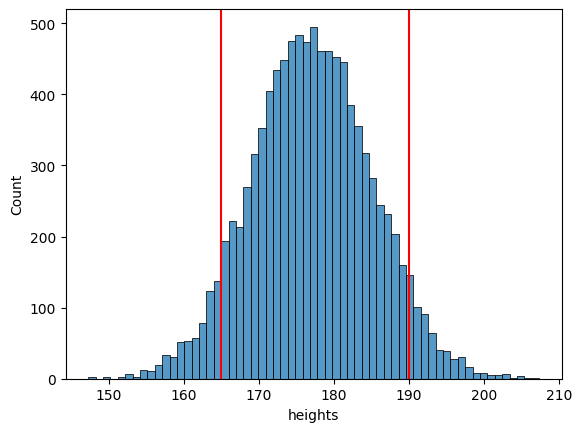

In [ ]:
heights = st.norm.rvs(loc=177, scale=8, size=10000)
heights_dict = {"heights":heights}
sns.histplot(x="heights", data=heights_dict)
plt.axvline(x=165, color="red")
plt.axvline(x=190, color="red")
plt.show()

### **Exercise: Two <u>independent</u> normal distributions**

Rohit has two freelance jobs. The pay for each job follows two independent normal distributions:

* `income1` from Rohit's first job has a mean of $500 and a standard deviation of $50
* `income2` from Rohit's second job has a mean of $1,000 and a standard deviation of $200

Rohit has asked for your help simulating his income so that he can budget his expenses properly. You'll use sampling to find the 95% confidence interval of Rohit's total income from both jobs.

### **Instructions**

* Use **`st.norm.rvs()`** to sample 1,000 times from the normal distribution, setting the proper mean and standard deviation and assigning the results to `income1` and `income2`.

* Approximate `total_income` by adding `income1` and `income2` together.

In [ ]:
# Sample from the normal distribution
income1 = st.norm.rvs(loc=500, scale=50, size=1000)
income2 = st.norm.rvs(loc=1000, scale=200, size=1000)

# Define total_income
total_income = income1 + income2
upper = np.quantile(total_income, 0.975)
lower = np.quantile(total_income, 0.025)
print([float(lower), float(upper)])

[1099.4123079218723, 1900.3424781927429]


What if these two incomes are _not_ independent of each other? How could you sample under dependent conditions?

# **Multinomial**

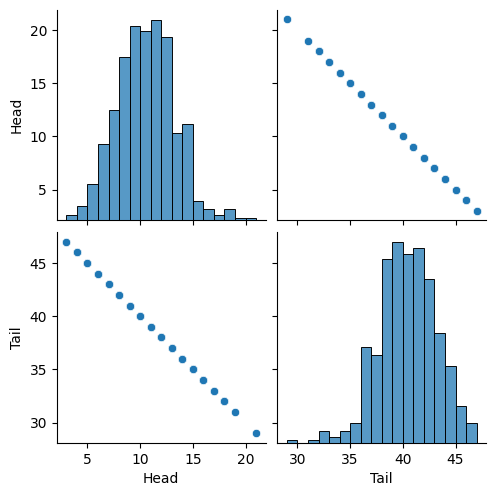

In [ ]:
results = st.multinomial.rvs(n=50, p=[0.2, 0.8], size=500)
df_results=pd.DataFrame({"Head":results[:, 0], "Tail":results[:, 1]})
sns.pairplot(df_results)
plt.show()

# **Independent bivariate normal distributions**

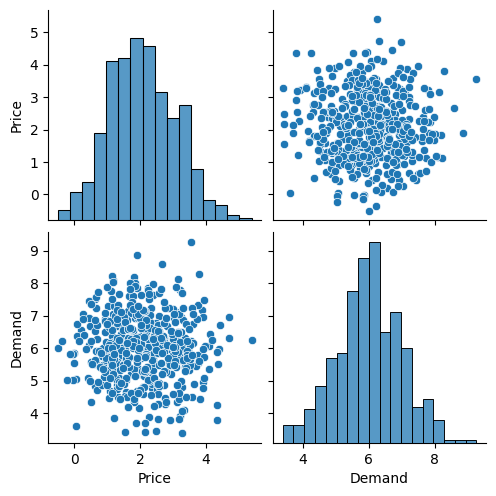

In [ ]:
results=st.multivariate_normal.rvs(mean=[2, 6], size=500)

df_results=pd.DataFrame({"Price":results[:, 0], "Demand":results[:, 1]})
sns.pairplot(df_results)
plt.show()

# **Dependent bivariate normal**

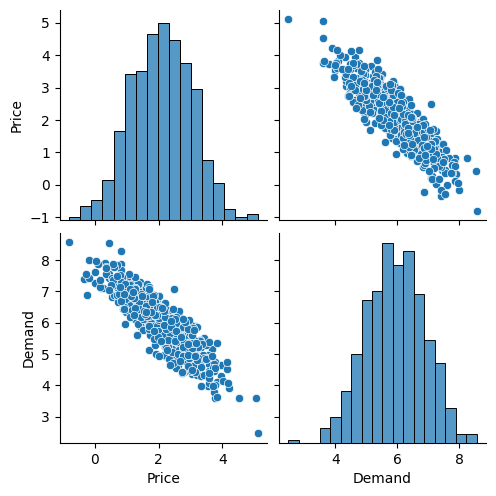

In [ ]:
cov_mat = np.array([[1,-0.9], [-0.9,1]])
results = st.multivariate_normal.rvs(mean=[2,6], size=500, cov=cov_mat)
df_results = pd.DataFrame({"Price":results[:,0],"Demand":results[:,1]})
sns.pairplot(df_results)
plt.show()

### **Exercise: Multinomial sampling**

Imagine a small town in Colorado, USA, which has on average 300 sunny days, 35 cloudy days, and 30 rainy days each year. As a scientist studying climate change, you are interested in the distributions of sunny, cloudy, and rainy days in a random span of 50 years if these averages are assumed to remain the same.

### **Instructions**

* Define the probabilities of sunny, cloudy, and rainy days.
* Simulate results for each variable.


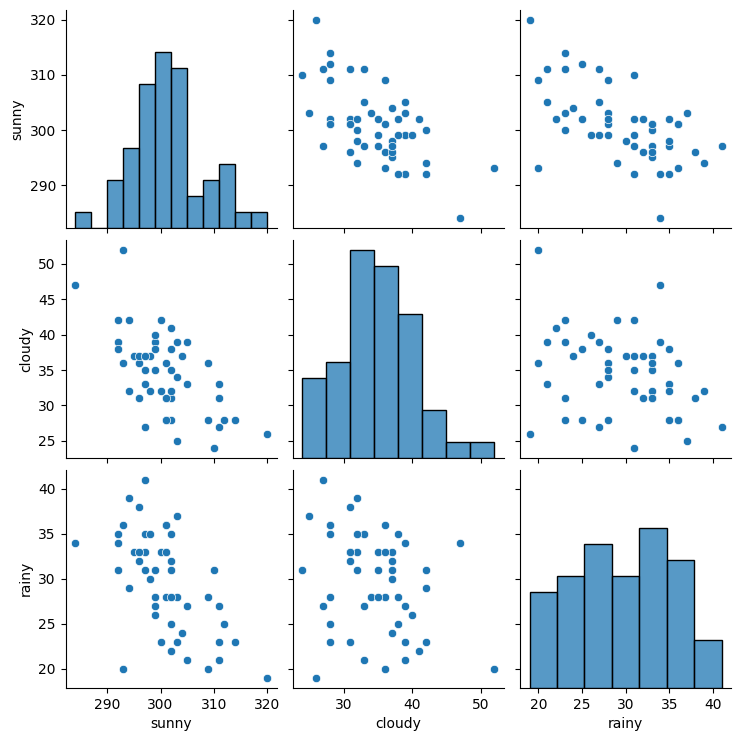

In [ ]:
p_sunny = 300/365
p_cloudy = 35/365
p_rainy = 30/365
num_of_days_in_a_year = 365
number_of_years = 50

# Simulate results
days = st.multinomial.rvs(num_of_days_in_a_year,
    [p_sunny, p_cloudy, p_rainy], size=number_of_years)

# Complete the definition of df_days
df_days = pd.DataFrame({"sunny": days[:, 0],
     "cloudy": days[:, 1],
     "rainy":  days[:, 2]})
sns.pairplot(df_days)
plt.show()

# **Why do we explore data before simulation?**

* Visualize the distribution of variables ==> to choose **correct distribution**

* Check and measure the correlation between predictor variables ==> get **covariance**

* Check and measure the correlation between predictor variables and the response

In [ ]:
import pandas as pd, numpy as np, scipy.stats as st, seaborn as sns, matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
df.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [ ]:
for var in ["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"]:
    distributions = [st.laplace, st.norm, st.expon]
    mles = [d.nnlf(d.fit(df[var]), df[var]) for d in distributions]
    best_fit = sorted(zip(distributions, mles), key=lambda x: x[1])[0]
    print(f"Best fit reached using {best_fit[0].name}, MLE value: {best_fit[1]}, for variable {var}")

Best fit reached using norm, MLE value: 1764.0693689033028, for variable age
Best fit reached using norm, MLE value: 1283.356127017369, for variable bmi
Best fit reached using norm, MLE value: 1787.7746251622739, for variable bp
Best fit reached using norm, MLE value: 2193.1564373753627, for variable tc
Best fit reached using norm, MLE value: 2136.0440476305284, for variable ldl
Best fit reached using norm, MLE value: 1758.1350738323013, for variable hdl
Best fit reached using norm, MLE value: 739.3762494786798, for variable tch
Best fit reached using norm, MLE value: 339.6620870566908, for variable ltg
Best fit reached using norm, MLE value: 1706.0467588930867, for variable glu


# **Parameters for a Multivariate normal simulation**

1. Mean of each variable ===> **`df[['col1', 'col2', 'col3']].mean()`**
2. Covariance matrix  ===> **`df[['col1', 'col2', 'col3']].cov()`**
3. For dependent variable ... must use ML prediction model from simulated independent variables


### **Exercise: Comparing simulated and historical data**

Perform a simulation using the multivariate normal distribution and the mean and covariance matrix of `df`. Then, you'll check the means of both the historical and simulated data. Are they similar?

The diabetes dataset has been loaded as a DataFrame, `df`.

### **Instructions**

* Perform the simulation 10,000 times using the multivariate normal distribution and the mean and covariance matrix of `df`.

* Use the **`.mean()`** method in pandas to calculate the mean values of the `bmi` and `tc` columns of the historical dataset `df` and the simulated `bmi` and `tc` results from `df_results` to assess whether they are similar.

* Similarly, use **`.cov()`** from pandas to calculate the covariance matrix of the `bmi` and `tc` columns of `df` and the simulated `bmi` and `tc` results from `df_results` to assess whether they are similar.

In [ ]:
import pandas as pd, numpy as np, scipy.stats as st, seaborn as sns, matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")

cov_df = df[["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"]].cov()
mean_df = df[["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"]].mean()

# Complete the code to perform the simulation
simulation_results = st.multivariate_normal.rvs(mean=mean_df, cov=cov_df, size=10000)
df_results = pd.DataFrame(simulation_results,columns=["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"])

# Calculate bmi and tc means for the historical and simulated results
print(df[["bmi","tc"]].mean())
print(df_results[["bmi","tc"]].mean())

# Calculate bmi and tc covariances for the historical and simulated results
print(df[["bmi","tc"]].cov())
print(df_results[["bmi","tc"]].cov())

bmi     26.375792
tc     189.140271
dtype: float64
bmi     26.383168
tc     189.349659
dtype: float64
           bmi           tc
bmi  19.519798    38.191612
tc   38.191612  1197.717241
           bmi           tc
bmi  19.319726    37.777138
tc   37.777138  1189.879327


The simulated means and covariances are similar to the data, suggesting the correct choice of distribution.

### **Exercise: The relationship between correlation and covariance matrices**

A correlation matrix is a standardized covariance matrix, where the correlation coefficients in the correlation matrix contain values from 0 to 1.

$cov(x,y) = corr(x,y) \times std(x) \times std(y)$

The equation above tells us  that $cov(x,y)$
, the covariance value, can be calculated by multiplying the correlation coefficient $corr(x,y)$
 with standard deviation of $x, std(x)$
,
, and the standard deviation of $y, std(y)$
,
. You'll test out this relationship in this exercise!

The diabetes dataset has been loaded as a DataFrame, `df`.

### **Instructions**

* Calculate the covariance matrix of `df[["bmi", "tc"]]`, saving this as `cov_df2`.
* Calculate the correlation matrix of `df[["bmi", "tc"]]`, saving this as `corr_df2`.

In [ ]:
# Calculate the covariance matrix of bmi and tc
cov_df2 = df[["bmi", "tc"]].cov()

# Calculate the correlation matrix of bmi and tc
corr_df2 = df[["bmi", "tc"]].corr()
std_df2 = df[["bmi","tc"]].std()

print(f'Covariance of bmi and tc from covariance matrix :{cov_df2.iloc[0][1]}')
print(f'Covariance of bmi and tc from correlation matrix :{corr_df2.iloc[0][1] * std_df2[0] * std_df2[1]}')

Covariance of bmi and tc from covariance matrix :38.191612029427134
Covariance of bmi and tc from correlation matrix :38.1916120294272


Covariance of `bmi` and `tc` in the diabetes dataset from correlation coefficients and standard deviations provide the same result as the covariance matrix.

# **Outcome differences based on `age` and `bmi`**

In [ ]:
from sklearn.linear_model import Lasso

df = pd.read_csv('diabetes.csv')
X = df[["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"]]
y = df[['y']]
regr_model = Lasso(alpha=1).fit(X, y)



132.62779710596115
120.99976976583959
144.69058556927007
5.911920129358133


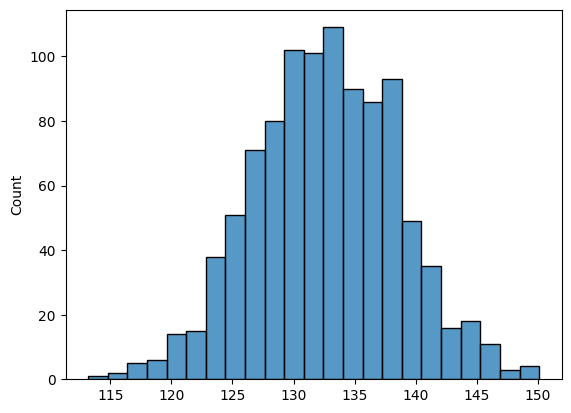

In [ ]:
y_diffs = []
for i in range(1000):
    simulation_results = st.multivariate_normal.rvs(mean=mean_df, size=1000, cov=cov_df)
    df_results = pd.DataFrame(simulation_results, columns=["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"])
    predicted_y = regr_model.predict(df_results)
    df_y = pd.DataFrame(predicted_y, columns=["predicted_y"])
    df_sum = pd.concat([df_results, df_y], axis=1)
    age_q25 = np.quantile(df_sum["age"], 0.25)
    age_q75 = np.quantile(df_sum["age"], 0.75)
    bmi_q25 = np.quantile(df_sum["bmi"], 0.25)
    bmi_q75 = np.quantile(df_sum["bmi"], 0.75)
    q75_outcome = np.mean(df_sum[(df_sum["bmi"] > bmi_q75) & (df_sum["age"] > age_q75)]["predicted_y"])
    q25_outcome = np.mean(df_sum[(df_sum["bmi"] < bmi_q25) & (df_sum["age"] < age_q25)]["predicted_y"])
    y_diff = q75_outcome - q25_outcome
    y_diffs.append(y_diff)

print(np.mean(y_diffs))
print(np.quantile(y_diffs,0.025))
print(np.quantile(y_diffs,0.975))
print(np.std(y_diffs))
sns.histplot(y_diffs)
plt.show()

# **Evaluate chosen distributions using Kolmogorov-Smirrnov test**

In [25]:
import pandas as pd, numpy as np, scipy.stats as st, seaborn as sns, matplotlib.pyplot as plt
from collections import namedtuple
CleanKstestResult = namedtuple("KstestResult", ["statistic", "pvalue", "statistic_location", "statistic_sign"])
dia = pd.read_csv("diabetes.csv")

cov_dia = df[["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"]].cov()
mean_dia = df[["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"]].mean()

results = []
list_of_dists = ["laplace", "norm", "expon"]
for i in list_of_dists:
    dist = getattr(st, i)
    param = dist.fit(dia["age"])
    result = st.kstest(dia["age"], i, args=param)
    result = CleanKstestResult(float(result.statistic),
                               float(result.pvalue),
                               int(result.statistic_location),
                               int(result.statistic_sign))
    print(result)

KstestResult(statistic=0.09511179937112832, pvalue=0.0006239579389182981, statistic_location=42, statistic_sign=1)
KstestResult(statistic=0.0615913626181368, pvalue=0.06703225234359811, statistic_location=51, statistic_sign=-1)
KstestResult(statistic=0.2536037941921312, pvalue=1.5202547969084796e-25, statistic_location=34, statistic_sign=-1)


อันไหน sig แปลว่า มีความมแตกต่างจาก distribution ที่เลือกมา ต้องเลือกอันที่ไม่ sig แปลว่า ไม่ต่าง

# **Visualizing simulation results**

In [21]:
from sklearn.linear_model import Lasso

dia = pd.read_csv('diabetes.csv')
X = dia[["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"]]
y = dia[['y']]
regr_model = Lasso(alpha=1).fit(X, y)

dic_diffs = {"age": [], "bmi":[], "bp":[], "tc":[], "ldl":[], "hdl":[], "tch":[], "ltg":[], "glu":[]}

for i in range(1000):
    simulation_results = st.multivariate_normal.rvs(mean=mean_df, size=1000, cov=cov_df)
    df_results = pd.DataFrame(simulation_results, columns=["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"])
    predicted_y = regr_model.predict(df_results)
    df_y = pd.DataFrame(predicted_y, columns=["predicted_y"])
    df_summary = pd.concat([df_results, df_y], axis=1)
    for var in ["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"]:
        var_q25 = np.quantile(df_summary[var], 0.25)
        var_q75 = np.quantile(df_summary[var], 0.75)
        q75_outcome = np.mean(df_summary[(df_summary[var] > var_q75)]["predicted_y"])
        q25_outcome = np.mean(df_summary[(df_summary[var] < var_q25)]["predicted_y"])
        y_diff = q75_outcome - q25_outcome
        dic_diffs[var].append(y_diff)
df_diffs = pd.DataFrame.from_dict(dic_diffs)
df_diffs.head()


,age,bmi,bp,tc,ldl,hdl,tch,ltg,glu
0,39.307219,112.603089,81.979312,43.013260,36.299922,-83.296764,84.286888,103.946183,73.650754
1,39.352464,114.811818,87.937955,40.327801,36.254908,-84.975444,91.503423,110.245507,74.799564
2,31.527289,113.343418,88.472860,30.160200,24.061861,-75.153315,80.570468,103.361200,73.786568
3,41.029997,112.601072,82.510659,49.466944,43.170075,-83.306576,87.087996,109.685771,78.072439
4,35.656418,115.928119,86.920799,41.555306,28.916588,-73.796074,81.350815,111.397459,77.869295


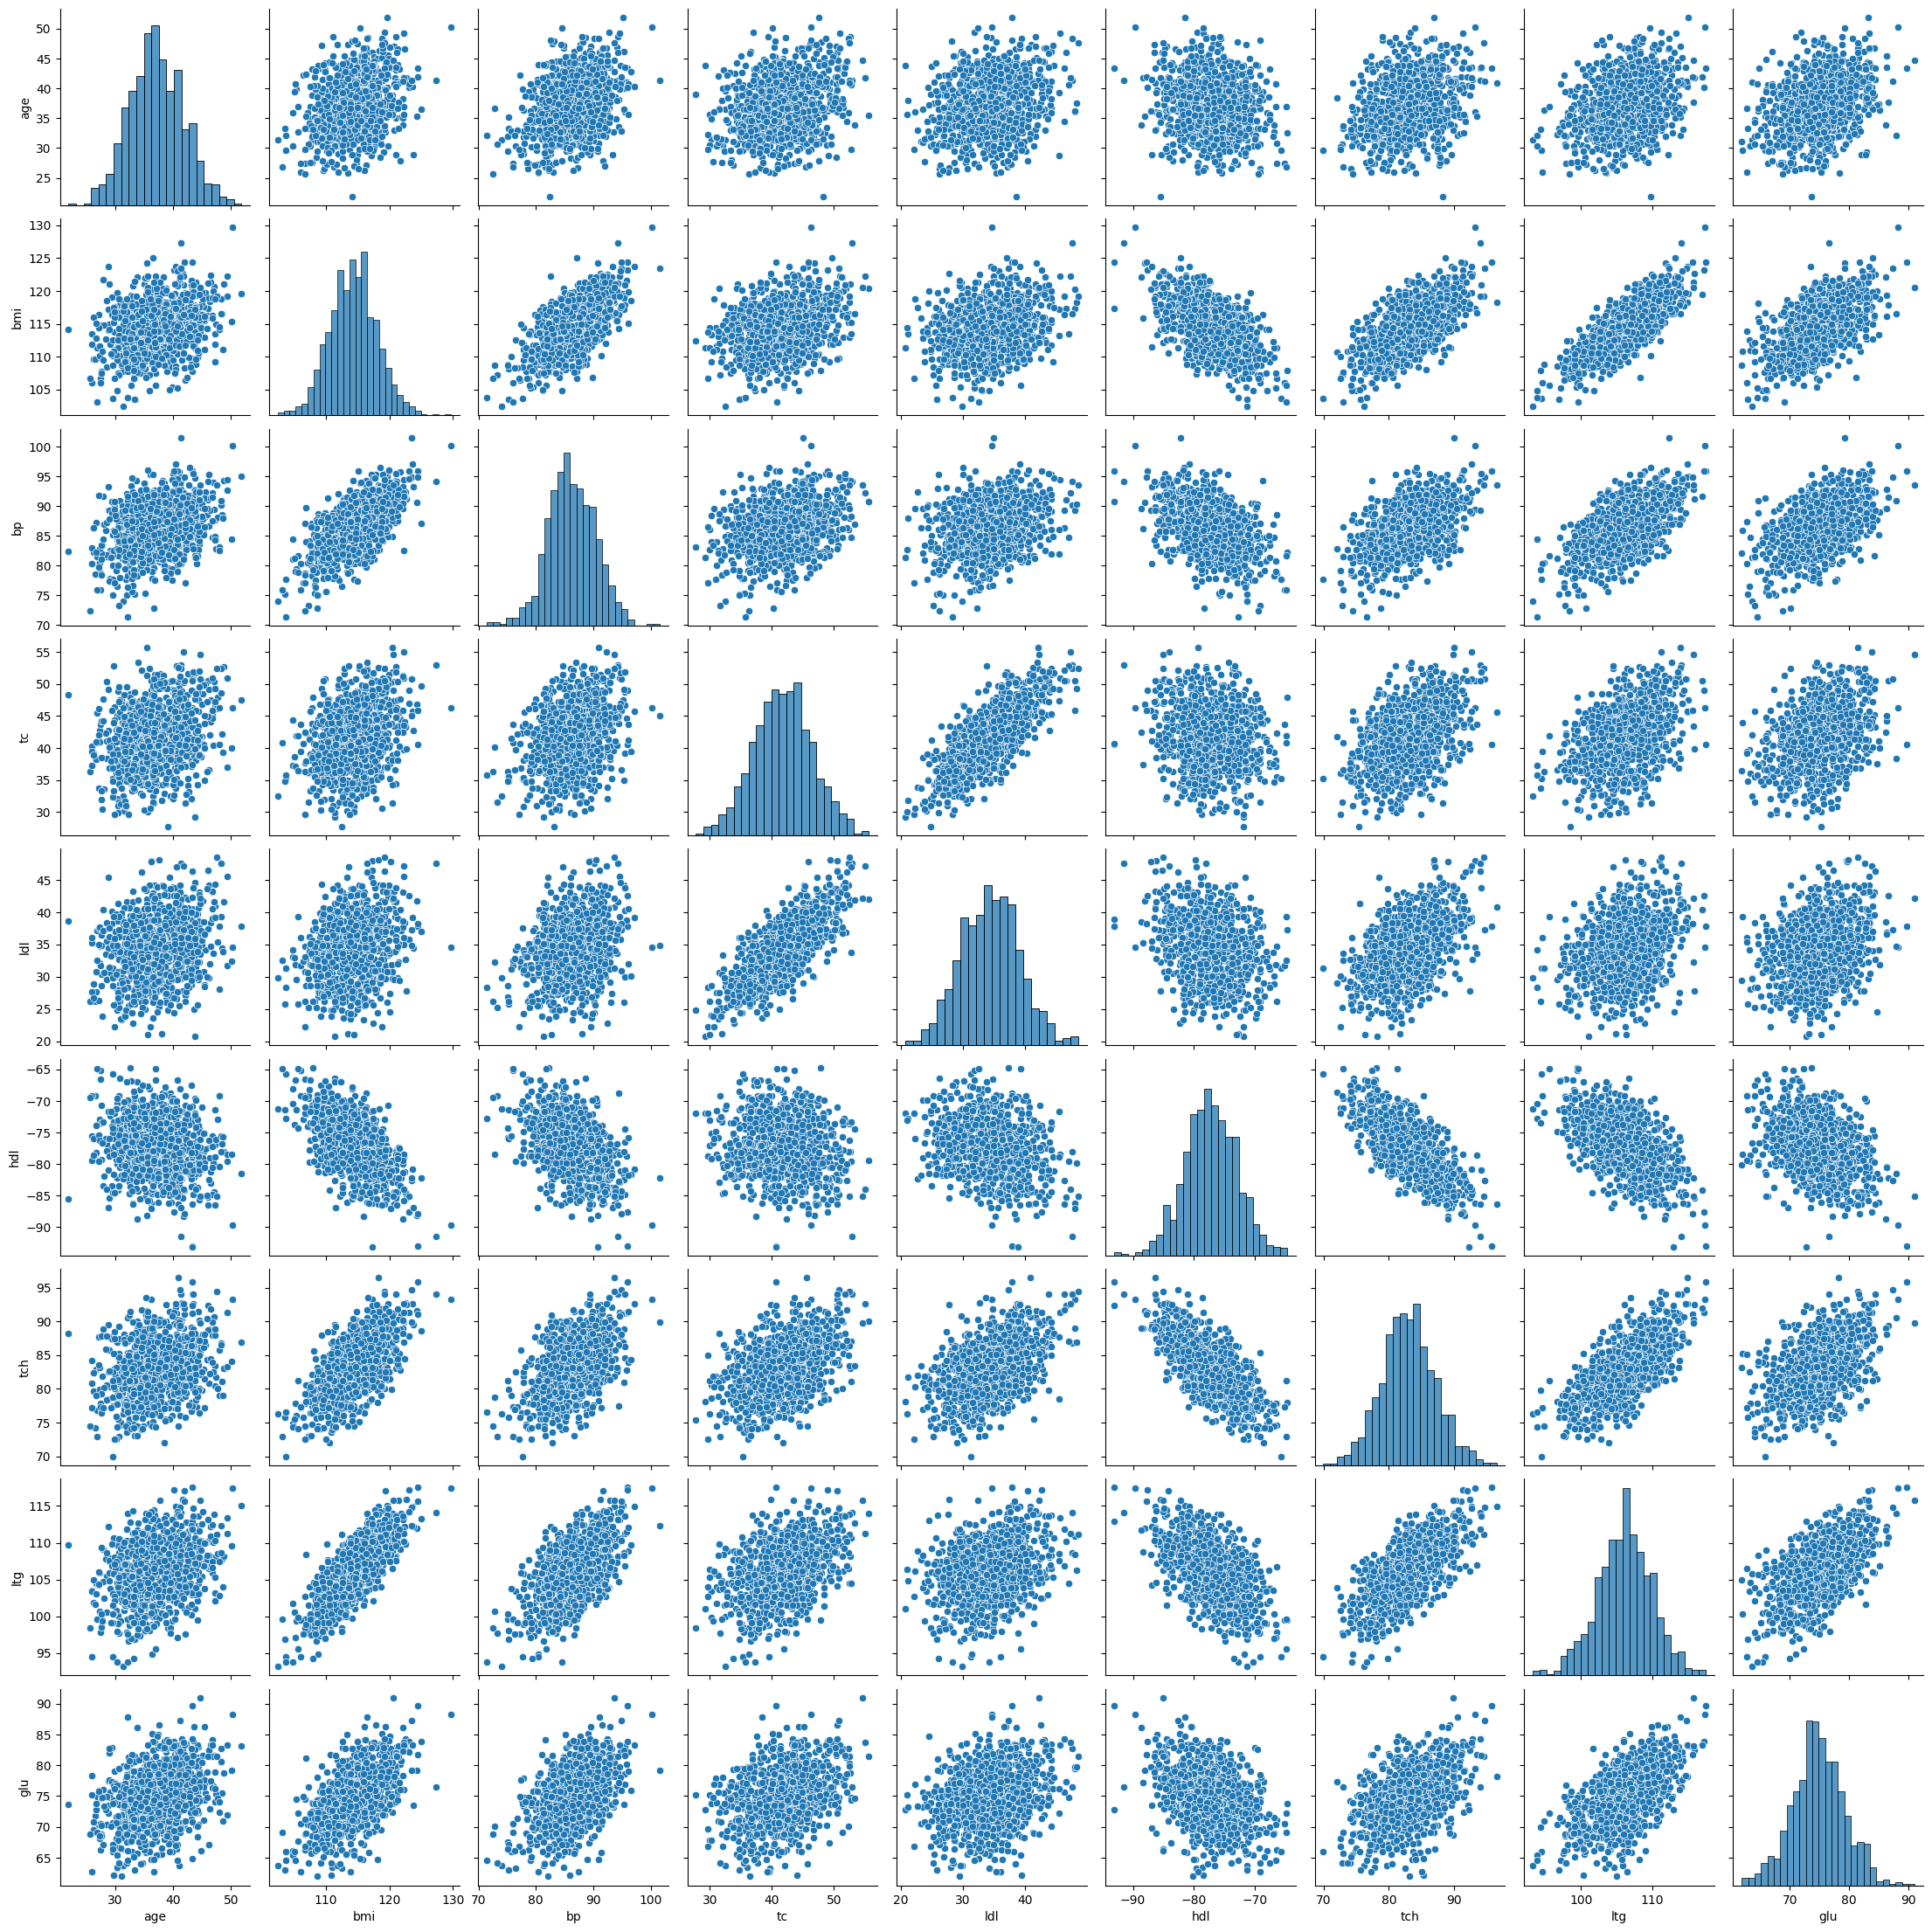

In [22]:
sns.pairplot(df_diffs)
plt.show()

The higher the HDL, the less disease progression

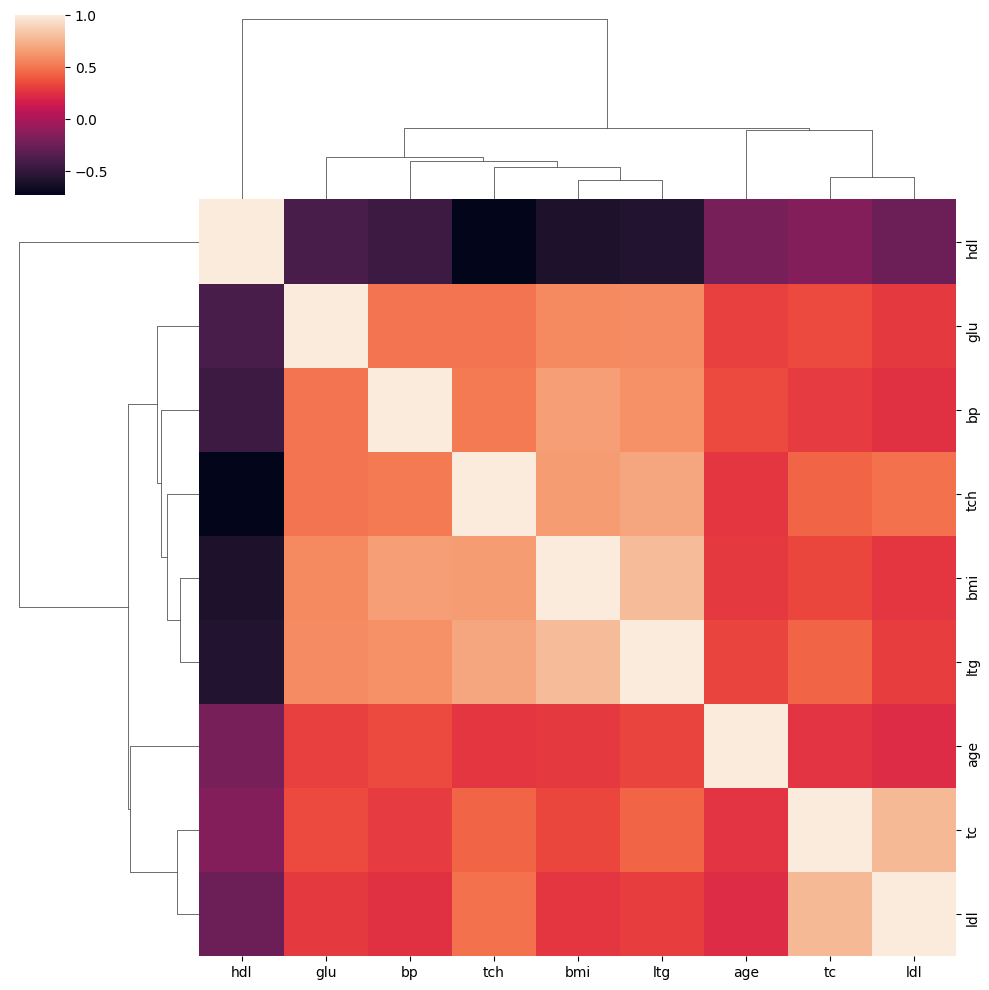

In [23]:
sns.clustermap(df_diffs.corr()); plt.show();

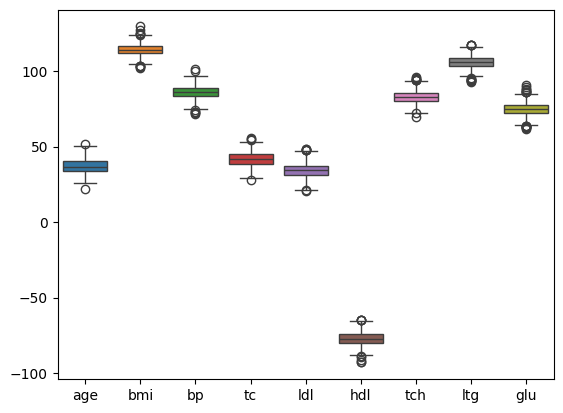

In [24]:
sns.boxplot(data=df_diffs); plt.show();

# **Sensitivity analysis**

If we increase or decrease the values for bmi and hdl using a Monte Carlo simulation, how
will the predicted y values (disease progression) change?

In [26]:
import pandas as pd, numpy as np, scipy.stats as st, seaborn as sns, matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

dia = pd.read_csv("diabetes.csv")
cov_dia = df[["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"]].cov()
mean_dia = df[["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"]].mean()
X = dia[["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"]]
y = dia[['y']]
regr_model = Lasso(alpha=1).fit(X, y)


def simulate_bmi_hdl(cov_dia, mean_list):
    list_ys = []
    for i in range(1000):
        simulation_results = st.multivariate_normal.rvs(mean=mean_list, size=1000, cov=cov_dia)
        df_results = pd.DataFrame(simulation_results, columns=["age","bmi","bp","tc","ldl","hdl","tch","ltg","glu"])
        predicted_y = regr_model.predict(df_results)
        df_y = pd.DataFrame(predicted_y, columns=["predicted_y"])
        df_summary = pd.concat([df_results, df_y], axis=1)
        y = np.mean(df_summary["predicted_y"])
        list_ys.append(y)
    return(np.mean(list_ys))

In [27]:
hdl = []
bmi = []
simu_y = []
for mean_hdl_inc in np.arange(-20, 50, 30):
    for mean_bmi_inc in np.arange(-7, 11, 3):
        mean_list = mean_dia + np.array([0, mean_bmi_inc, 0, 0, 0, mean_hdl_inc, 0, 0, 0])
        hdl.append(mean_hdl_inc)
        bmi.append(mean_bmi_inc)
        mean_y = simulate_bmi_hdl(cov_dia, mean_list)
        simu_y.append(mean_y)
df_sa = pd.concat([pd.Series(hdl), pd.Series(bmi), pd.Series(simu_y)], axis=1)
df_sa.columns = ["hdl_inc", "bmi_inc", "y"]
df_sa.head()

,hdl_inc,bmi_inc,y
0,-20,-7,128.417083
1,-20,-4,146.854490
2,-20,-1,165.360578
3,-20,2,183.893054
4,-20,5,202.222878


In [29]:
df_sa.sort_values(by=['hdl_inc', 'bmi_inc']).pivot(index='hdl_inc', columns='bmi_inc', values='y')\
                                            .style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

bmi_inc,-7,-4,-1,2,5,8
hdl_inc,,,,,,
-20,128.417083,146.854490,165.360578,183.893054,202.222878,220.654173
10,99.356371,117.882013,136.335015,154.737169,173.357112,191.704786
40,70.389021,88.732844,107.251487,125.741820,144.146943,162.634714


### **Exercise: Simulation of a profit problem**

You work for a company that manufactures industrial equipment. The sales price of each piece of equipment is $100,000. You also know that there is a strong negative correlation between the `inflation_rate` and sales `volume`. This relationship is captured by the covariance matrix `cov_matrix`.

The function `profit_next_year_mc()` performs a Monte Carlo simulation returning expected profit (in thousands of dollars), given the mean inflation rate and mean sales volume as arguments. You'll also need to pass `n`, the number of time the simulation should be run. The function has been loaded for you, and the definition is below.
```
def profit_next_year_mc(mean_inflation, mean_volume, n):
  profits = []
  for i in range(n):
    # Generate inputs by sampling from the multivariate normal distribution
    rate_sales_volume = st.multivariate_normal.rvs(mean=[mean_inflation,mean_volume], cov=cov_matrix,size=1000)
    # Deterministic calculation of company profit
    price = 100 * (100 + rate_sales_volume[:,0])/100
    volume = rate_sales_volume[:,1]
    loan_and_cost = 50 * volume + 45 * (100 + 3 * rate_sales_volume[:,0]) * (volume/100)
    profit = (np.mean(price * volume - loan_and_cost))
    profits.append(profit)
  return profits
```
### **Instructions**

* Perform a Monte Carlo simulation by running `profit_next_year_mc()` 500 times using a `mean_inflation` of 2 and a `mean_volume` of 500.

* Visualize the simulation results using a `displot`.

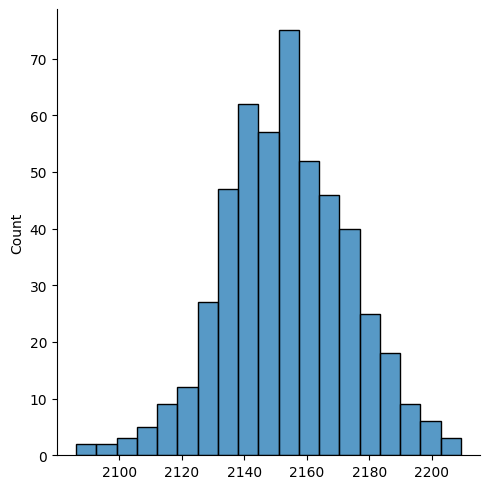

In [30]:
def profit_next_year_mc(mean_inflation, mean_volume, n):
  profits = []
  for i in range(n):
      # Generate inputs by sampling from the multivariate normal distribution
      rate_sales_volume = st.multivariate_normal.rvs(mean=[mean_inflation,mean_volume], cov=cov_matrix,size=1000)
      # Deterministic calculation of company profit
      price = 100 * (100 + rate_sales_volume[:,0])/100
      volume = rate_sales_volume[:,1]
      loan_and_cost = 50 * volume + 45 * (100 + 3 * rate_sales_volume[:,0]) * (volume/100)
      profit = (np.mean(price * volume - loan_and_cost))
      profits.append(profit)
  return profits

cov_matrix = np.array([[11. , -9.8], [-9.8, 11. ]])

# Run a Monte Carlo simulation 500 times using a mean_inflation of 2 and a mean_volume of 500
profits = profit_next_year_mc(2, 500, 500)

# Create a displot of the results
sns.displot(profits)
plt.show()


### **Exercise: Company sensitivity analysis**

You'll now examine what would happen to profits for the company at various `mean_inflation` and `mean_volume` values. This will help the company plan for several levels of inflation and sales volumes since no company can ever be certain what inflation or sales volumes they will have in the future.

The mean inflation percentages you'd like to explore are `0, 1, 2, 5, 10, 15, 20, 50`, while the sales values for use as the mean volume value are `100, 200, 500, 800, 1000`.

### **Instructions**

* Complete the Monte Carlo simulation by running `profit_next_year_mc()` to calculate profit 100 times, each time looping through the list of `infl` values and the list of `vol` values.
* Use a `displot` to visualize the simulation results saved in the `Profit` column of the resulting DataFrame.

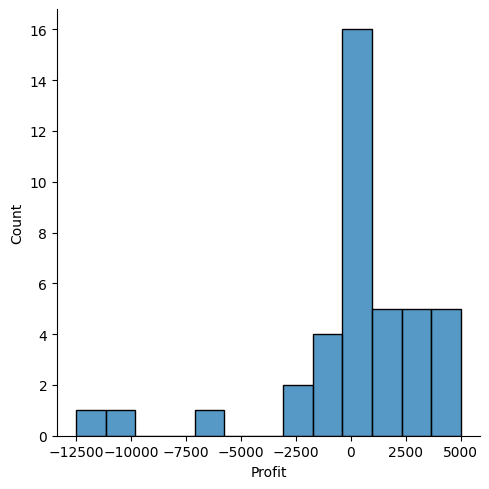

In [31]:
x1 = []
x2 = []
y = []
for infl in [0, 1, 2, 5, 10, 15, 20, 50]:
    for vol in [100, 200, 500, 800, 1000]:
        avg_prof = np.mean(profit_next_year_mc(infl, vol, 100))
        x1.append(infl)
        x2.append(vol)
        y.append(avg_prof)

df_sa = pd.concat([pd.Series(x1), pd.Series(x2), pd.Series(y)], axis=1)
df_sa.columns = ["Inflation", "Volume", "Profit"]
sns.displot(df_sa['Profit'])
plt.show()